In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

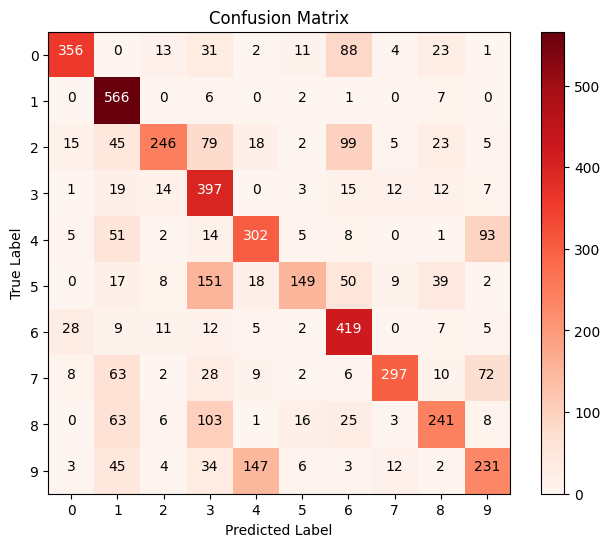

In [59]:
file_path = "inference_results.csv"
data = pd.read_csv(file_path)

confusion_matrix = np.zeros((10, 10), dtype=int)
for index, row in data.iterrows():
    true_label = int(row['Label'])
    predicted_label = int(row['Prediction'])
    confusion_matrix[true_label][predicted_label] += 1

plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Reds)
# Overlay counts on the heatmap
thresh = confusion_matrix.max() / 2.
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [60]:
# Give the count of labels per class
label_counts = data['Label'].value_counts().sort_index()
for label, count in label_counts.items():
    print(f"Label {label}: {count} samples")

Label 0: 529 samples
Label 1: 582 samples
Label 2: 537 samples
Label 3: 480 samples
Label 4: 481 samples
Label 5: 443 samples
Label 6: 498 samples
Label 7: 497 samples
Label 8: 466 samples
Label 9: 487 samples


In [61]:
# From confusion matrix, calculate accuracy
correct_predictions = np.trace(confusion_matrix)
total_predictions = np.sum(confusion_matrix)
accuracy = correct_predictions / total_predictions
print(f'Accuracy: {accuracy * 100:.2f}%')

# It saves correct in pd
accuracy = data['Correct'].sum() / len(data)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 64.08%
Accuracy: 64.08%


In [9]:
# Print the average Reward for each label, print from largest to smallest
average_rewards = []
for label in range(10):
    label_data = data[data['Label'] == label]
    average_reward = label_data['Reward'].mean()
    average_rewards.append((label, average_reward))

# Sort by average reward
average_rewards.sort(key=lambda x: x[1], reverse=True)

for label, avg_reward in average_rewards:
    print(f'Average Reward for label {label}: {avg_reward:.2f}')

Average Reward for label 0: -0.98
Average Reward for label 7: -1.00
Average Reward for label 1: -1.10
Average Reward for label 2: -1.18
Average Reward for label 8: -1.26
Average Reward for label 6: -1.28
Average Reward for label 4: -1.29
Average Reward for label 3: -1.66
Average Reward for label 9: -1.80
Average Reward for label 5: -1.95
